# Testing Version 2.0 :D

In [1]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
#
from Calculations_Functions import proportions_from_filename, metrics_table
from matplotlib.colors import ListedColormap
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')

In [2]:
colors = [(0, 0, 0, 1),  # Black for land (1)
          (0, 0, 0, 0)]  # Transparent for water (0)
cmap = ListedColormap(colors)

Functions for comparisons :D

Filenames for Ratio Testing:

- Ratio MC = 0.012

- Ratio MC = 0.2

- Ratio MC = 0.4

Keep $\tau = 0.01$ and the Sinking Velocity of marine and sewage particles to 5.52 and 12.84 respectively

Note: The bigger the Ratio, less colloids into the water column

In [3]:
filenames_ratio_testing = ['/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_185_days_full_updated_kernel_ratio_0_012.zarr',
                           '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_185_days_full_updated_kernel_ratio_0_2.zarr',
                           '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_185_days_full_updated_kernel_ratio_0_4.zarr']

In [4]:
run_ratio_0_012 = proportions_from_filename(filename = filenames_ratio_testing[0])
run_ratio_0_2 = proportions_from_filename(filename = filenames_ratio_testing[1])
run_ratio_0_4 = proportions_from_filename(filename = filenames_ratio_testing[2])
#
table_ratio_0_012  = metrics_table(filename = filenames_ratio_testing[0], plot = False)
table_ratio_0_2  = metrics_table(filename = filenames_ratio_testing[1], plot = False)
table_ratio_0_4  = metrics_table(filename = filenames_ratio_testing[2], plot = False)

In [5]:
water_ratio_0_012, sediment_ratio_0_012 =  run_ratio_0_012['Sewage Water'] + run_ratio_0_012['Colloidal Water'] + run_ratio_0_012['Marine Water'] , run_ratio_0_012['Sewage Sediment'] + run_ratio_0_012['Colloidal Sediment'] + run_ratio_0_012['Marine Sediment']
water_ratio_0_2, sediment_ratio_0_2 =  run_ratio_0_2['Sewage Water'] + run_ratio_0_2['Colloidal Water'] + run_ratio_0_2['Marine Water'] , run_ratio_0_2['Sewage Sediment'] + run_ratio_0_2['Colloidal Sediment'] + run_ratio_0_2['Marine Sediment']
water_ratio_0_4, sediment_ratio_0_4 =  run_ratio_0_4['Sewage Water'] + run_ratio_0_4['Colloidal Water'] + run_ratio_0_4['Marine Water'] , run_ratio_0_4['Sewage Sediment'] + run_ratio_0_4['Colloidal Sediment'] + run_ratio_0_4['Marine Sediment']

/tmp/ipykernel_3359970/149640350.py:79: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax6.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
/tmp/ipykernel_3359970/149640350.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax6.scatter(wc_ratio_0_012.lon[:,-1], wc_ratio_0_012.lat[:,-1], c='b', s=1, alpha=0.5, label=rf"W.C. = $\mathbf{{{np.round(water_ratio_0_012[-1], 2)}}}\ \%$")
/tmp/ipykernel_3359970/149640350.py:81: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent

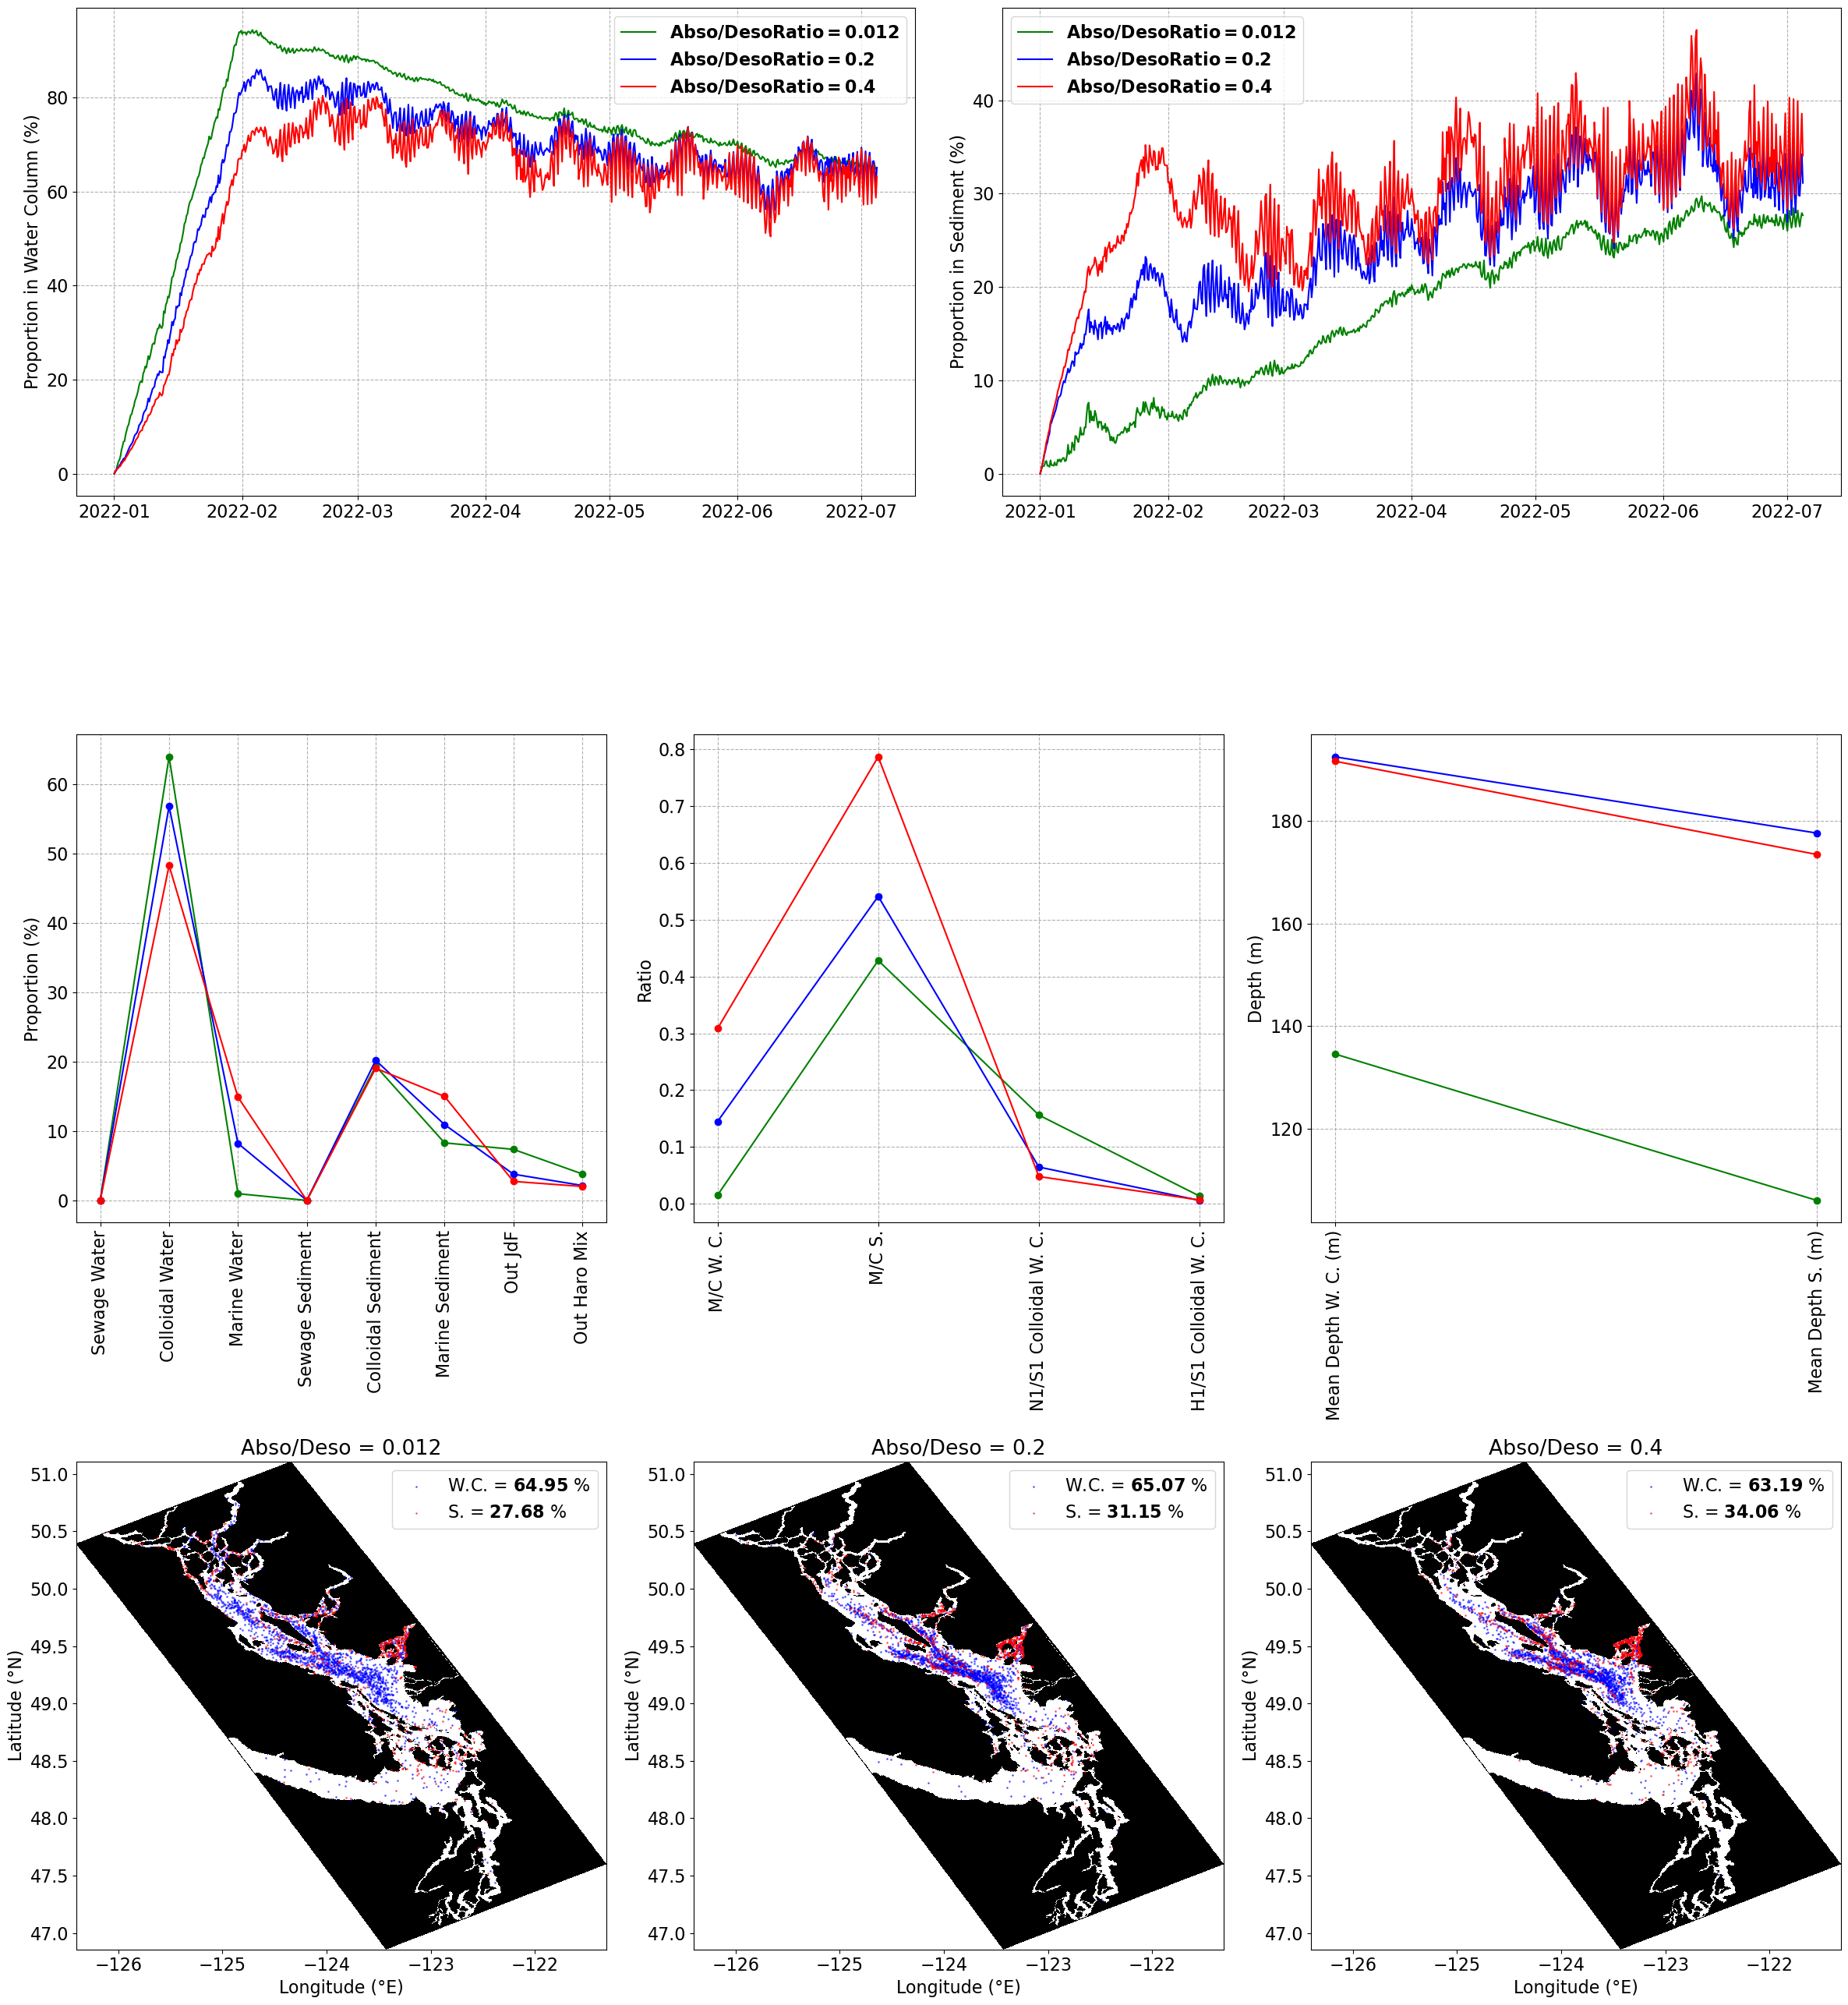

In [6]:
import matplotlib.gridspec as gridspec
#
data_ratio_0_012 = xr.open_zarr(filenames_ratio_testing[0])
wc_ratio_0_012 = data_ratio_0_012.where((data_ratio_0_012.status < 4)& (data_ratio_0_012.status > 0))
sed_ratio_0_012 = data_ratio_0_012.where((data_ratio_0_012.status > 10))
data_ratio_0_2 = xr.open_zarr(filenames_ratio_testing[1])
wc_ratio_0_2 = data_ratio_0_2.where((data_ratio_0_2.status < 4)& (data_ratio_0_2.status > 0))
sed_ratio_0_2 = data_ratio_0_2.where((data_ratio_0_2.status > 10))
data_ratio_0_4 = xr.open_zarr(filenames_ratio_testing[2])
wc_ratio_0_4 = data_ratio_0_4.where((data_ratio_0_4.status < 4)& (data_ratio_0_4.status > 0))
sed_ratio_0_4 = data_ratio_0_4.where((data_ratio_0_4.status > 10))
#

plt.rcParams.update({'font.size': 16})

# Create custom GridSpec: 3 rows, 6 columns
fig = plt.figure(figsize=(24, 26))
gs = gridspec.GridSpec(3, 6)

# === Top row (2 panels) ===
ax1 = fig.add_subplot(gs[0, 0:3])
ax2 = fig.add_subplot(gs[0, 3:6])

# === Middle row (3 panels) ===
ax3 = fig.add_subplot(gs[1, 0:2])
ax4 = fig.add_subplot(gs[1, 2:4])
ax5 = fig.add_subplot(gs[1, 4:6])

# === Bottom row (3 spatial maps) ===
ax6 = fig.add_subplot(gs[2, 0:2])
ax7 = fig.add_subplot(gs[2, 2:4])
ax8 = fig.add_subplot(gs[2, 4:6])

# === Plotting ===

# Top left
ax1.plot(water_ratio_0_012, 'g', label=rf"$\bf{{Abso/Deso Ratio = 0.012}}$")
ax1.plot(water_ratio_0_2, 'b', label=rf"$\bf{{Abso/Deso Ratio = 0.2}}$")
ax1.plot(water_ratio_0_4, 'r', label=rf"$\bf{{Abso/Deso Ratio = 0.4}}$")
ax1.grid(linestyle='--')
ax1.legend()
ax1.set_ylabel('Proportion in Water Column (%)')

# Top right
ax2.plot(sediment_ratio_0_012, 'g', label=rf"$\bf{{Abso/Deso Ratio = 0.012}}$")
ax2.plot(sediment_ratio_0_2, 'b', label=rf"$\bf{{Abso/Deso Ratio = 0.2}}$")
ax2.plot(sediment_ratio_0_4, 'r', label=rf"$\bf{{Abso/Deso Ratio = 0.4}}$")
ax2.grid(linestyle='--')
ax2.legend()
ax2.set_ylabel('Proportion in Sediment (%)')

# Middle left
ax3.plot(run_ratio_0_012.columns[1:], run_ratio_0_012.iloc[-1][1:].values, '-o', color='g', label='Abso/Deso = 0.012')
ax3.plot(run_ratio_0_2.columns[1:], run_ratio_0_2.iloc[-1][1:].values, '-o', color='b', label='Abso/Deso = 0.2')
ax3.plot(run_ratio_0_4.columns[1:], run_ratio_0_4.iloc[-1][1:].values, '-o', color='r', label='Abso/Deso = 0.4')
ax3.grid(linestyle='--')
ax3.tick_params(axis='x', rotation=90)
ax3.set_ylabel('Proportion (%)')

# Middle center
ax4.plot(table_ratio_0_012.columns[1:5], table_ratio_0_012.loc[0].values[1:5], '-o', color='g')
ax4.plot(table_ratio_0_2.columns[1:5], table_ratio_0_2.loc[0].values[1:5], '-o', color='b')
ax4.plot(table_ratio_0_4.columns[1:5], table_ratio_0_4.loc[0].values[1:5], '-o', color='r')
ax4.grid(linestyle='--')
ax4.tick_params(axis='x', rotation=90)
ax4.set_ylabel('Ratio')

# Middle right
ax5.plot(table_ratio_0_012.columns[-2:], table_ratio_0_012.loc[0].values[-2:], '-o', color='g')
ax5.plot(table_ratio_0_2.columns[-2:], table_ratio_0_2.loc[0].values[-2:], '-o', color='b')
ax5.plot(table_ratio_0_4.columns[-2:], table_ratio_0_4.loc[0].values[-2:], '-o', color='r')
ax5.grid(linestyle='--')
ax5.tick_params(axis='x', rotation=90)
ax5.set_ylabel('Depth (m)')

# === Spatial patterns ===

# Map 1
ax6.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax6.scatter(wc_ratio_0_012.lon[:,-1], wc_ratio_0_012.lat[:,-1], c='b', s=1, alpha=0.5, label=rf"W.C. = $\mathbf{{{np.round(water_ratio_0_012[-1], 2)}}}\ \%$")
ax6.scatter(sed_ratio_0_012.lon[:,-1], sed_ratio_0_012.lat[:,-1], c='r', s=1, alpha=0.5, label=rf"S. = $\mathbf{{{np.round(sediment_ratio_0_012[-1], 2)}}}\ \%$")
ax6.set_title('Abso/Deso = 0.012')
ax6.set_ylabel('Latitude (°N)')
ax6.set_xlabel('Longitude (°E)')
ax6.legend()

# Map 2
ax7.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax7.scatter(wc_ratio_0_2.lon[:,-1], wc_ratio_0_2.lat[:,-1], c='b', s=1, alpha=0.5, label=rf"W.C. = $\mathbf{{{np.round(water_ratio_0_2[-1], 2)}}}\ \%$")
ax7.scatter(sed_ratio_0_2.lon[:,-1], sed_ratio_0_2.lat[:,-1], c='r', s=1, alpha=0.5, label=rf"S. = $\mathbf{{{np.round(sediment_ratio_0_2[-1], 2)}}}\ \%$")
ax7.set_title('Abso/Deso = 0.2')
ax7.set_ylabel('Latitude (°N)')
ax7.set_xlabel('Longitude (°E)')
ax7.legend()

# Map 3
ax8.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax8.scatter(wc_ratio_0_4.lon[:,-1], wc_ratio_0_4.lat[:,-1], c='b', s=1, alpha=0.5, label=rf"W.C. = $\mathbf{{{np.round(water_ratio_0_4[-1], 2)}}}\ \%$")
ax8.scatter(sed_ratio_0_4.lon[:,-1], sed_ratio_0_4.lat[:,-1], c='r', s=1, alpha=0.5, label=rf"S. = $\mathbf{{{np.round(sediment_ratio_0_4[-1], 2)}}}\ \%$")
ax8.set_title('Abso/Deso = 0.4')
ax8.set_ylabel('Latitude (°N)')
ax8.set_xlabel('Longitude (°E)')
ax8.legend()

# Final layout
plt.tight_layout()
plt.show()


Filenames for $\tau$ Testing:

- $\tau$ = 0.01

- $\tau$ = 0.05

- $\tau$ = 0.25

Keep Ratio MC = 0.2 and the Sinking Velocity of marine and sewage particles to 5.52 and 12.84 respectively

Note: The bigger $\tau$ is, more difficult is for the particles to resuspend

In [7]:
filenames_tau_testing = ['/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_185_days_full_updated_kernel_ratio_0_2.zarr',
                         '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_185_days_full_updated_kernel_tau_0_05.zarr',
                         '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_185_days_full_updated_kernel_tau_0_25.zarr']

In [8]:
run_tau_0_01 = proportions_from_filename(filename = filenames_tau_testing[0])
run_tau_0_05 = proportions_from_filename(filename = filenames_tau_testing[1])
run_tau_0_25 = proportions_from_filename(filename = filenames_tau_testing[2])
#
table_tau_0_01  = metrics_table(filename = filenames_tau_testing[0], plot = False)
table_tau_0_05  = metrics_table(filename = filenames_tau_testing[1], plot = False)
table_tau_0_25  = metrics_table(filename = filenames_tau_testing[2], plot = False)

In [9]:
water_tau_0_01, sediment_tau_0_01 =  run_tau_0_01['Sewage Water'] + run_tau_0_01['Colloidal Water'] + run_tau_0_01['Marine Water'] , run_tau_0_01['Sewage Sediment'] + run_tau_0_01['Colloidal Sediment'] + run_tau_0_01['Marine Sediment']
water_tau_0_05, sediment_tau_0_05 =  run_tau_0_05['Sewage Water'] + run_tau_0_05['Colloidal Water'] + run_tau_0_05['Marine Water'] , run_tau_0_05['Sewage Sediment'] + run_tau_0_05['Colloidal Sediment'] + run_tau_0_05['Marine Sediment']
water_tau_0_25, sediment_tau_0_25 =  run_tau_0_25['Sewage Water'] + run_tau_0_25['Colloidal Water'] + run_tau_0_25['Marine Water'] , run_tau_0_25['Sewage Sediment'] + run_tau_0_25['Colloidal Sediment'] + run_tau_0_25['Marine Sediment']

/tmp/ipykernel_3359970/1215682082.py:71: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax6.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
/tmp/ipykernel_3359970/1215682082.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label=rf"W.C. = $\mathbf{{{np.round(water_tau_0_01[-1], 2)}}}\ \%$")
/tmp/ipykernel_3359970/1215682082.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label=r

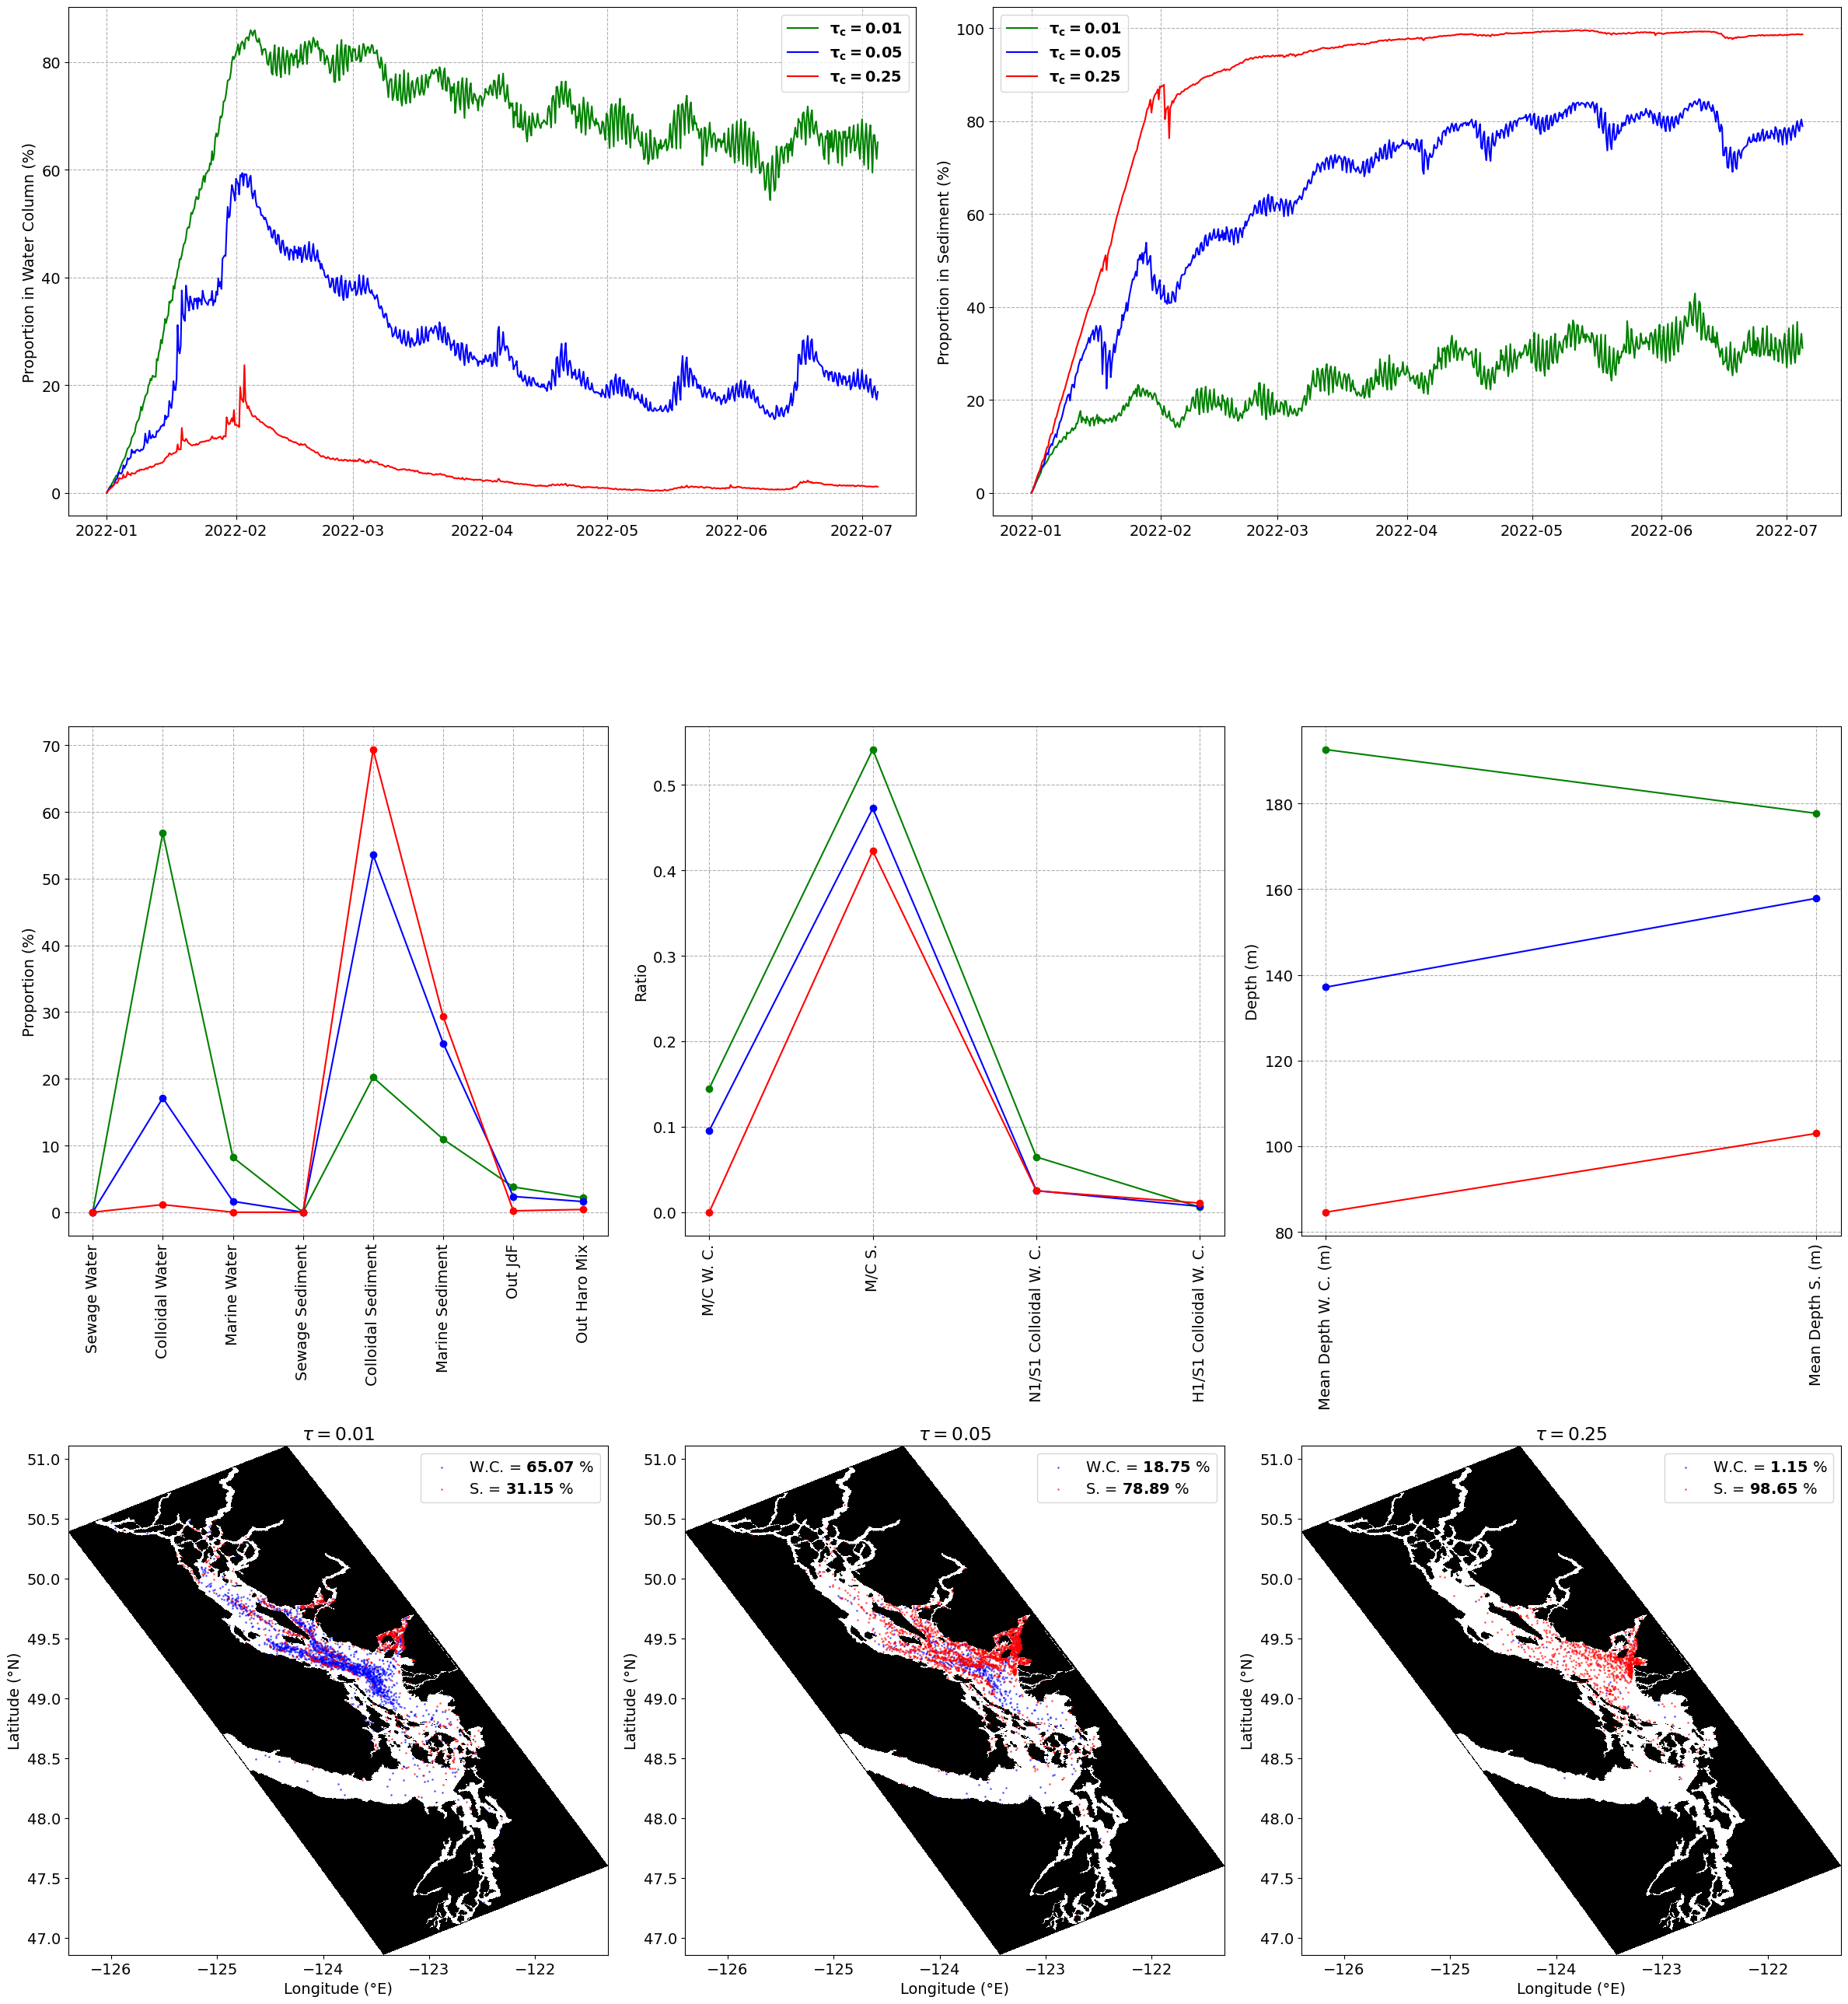

In [10]:
plt.rcParams.update({'font.size': 16})
#
data_tau_0_01 = xr.open_zarr(filenames_tau_testing[0])
wc_tau_0_01 = data_tau_0_01.where((data_tau_0_01.status < 4)& (data_tau_0_01.status > 0))
sed_tau_0_01 = data_tau_0_01.where((data_tau_0_01.status > 10))
data_tau_0_05 = xr.open_zarr(filenames_tau_testing[1])
wc_tau_0_05 = data_tau_0_05.where((data_tau_0_05.status < 4)& (data_tau_0_05.status > 0))
sed_tau_0_05 = data_tau_0_05.where((data_tau_0_05.status > 10))
data_tau_0_25 = xr.open_zarr(filenames_tau_testing[2])
wc_tau_0_25 = data_tau_0_25.where((data_tau_0_25.status < 4)& (data_tau_0_25.status > 0))
sed_tau_0_25 = data_tau_0_25.where((data_tau_0_25.status > 10))
#
# === Plotting ===
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(24, 26))
gs = gridspec.GridSpec(3, 6)

# Top row
ax1 = fig.add_subplot(gs[0, 0:3])
ax2 = fig.add_subplot(gs[0, 3:6])

# Middle row
ax3 = fig.add_subplot(gs[1, 0:2])
ax4 = fig.add_subplot(gs[1, 2:4])
ax5 = fig.add_subplot(gs[1, 4:6])

# Bottom row (maps)
ax6 = fig.add_subplot(gs[2, 0:2])
ax7 = fig.add_subplot(gs[2, 2:4])
ax8 = fig.add_subplot(gs[2, 4:6])

# === Top plots ===
ax1.plot(water_tau_0_01, 'g', label=rf"$\bf{{\tau_c = 0.01}}$")
ax1.plot(water_tau_0_05, 'b', label=rf"$\bf{{\tau_c = 0.05}}$")
ax1.plot(water_tau_0_25, 'r', label=rf"$\bf{{\tau_c = 0.25}}$")
ax1.grid(linestyle='--')
ax1.legend()
ax1.set_ylabel('Proportion in Water Column (%)')

ax2.plot(sediment_tau_0_01, 'g', label=rf"$\bf{{\tau_c = 0.01}}$")
ax2.plot(sediment_tau_0_05, 'b', label=rf"$\bf{{\tau_c = 0.05}}$")
ax2.plot(sediment_tau_0_25, 'r', label=rf"$\bf{{\tau_c = 0.25}}$")
ax2.grid(linestyle='--')
ax2.legend()
ax2.set_ylabel('Proportion in Sediment (%)')

# === Middle plots ===
ax3.plot(run_tau_0_01.columns[1:], run_tau_0_01.iloc[-1][1:].values, '-o', color='g')
ax3.plot(run_tau_0_05.columns[1:], run_tau_0_05.iloc[-1][1:].values, '-o', color='b')
ax3.plot(run_tau_0_25.columns[1:], run_tau_0_25.iloc[-1][1:].values, '-o', color='r')
ax3.grid(linestyle='--')
ax3.tick_params(axis='x', rotation=90)
ax3.set_ylabel('Proportion (%)')

ax4.plot(table_tau_0_01.columns[1:5], table_tau_0_01.loc[0].values[1:5], '-o', color='g')
ax4.plot(table_tau_0_05.columns[1:5], table_tau_0_05.loc[0].values[1:5], '-o', color='b')
ax4.plot(table_tau_0_25.columns[1:5], table_tau_0_25.loc[0].values[1:5], '-o', color='r')
ax4.grid(linestyle='--')
ax4.tick_params(axis='x', rotation=90)
ax4.set_ylabel('Ratio')

ax5.plot(table_tau_0_01.columns[-2:], table_tau_0_01.loc[0].values[-2:], '-o', color='g')
ax5.plot(table_tau_0_05.columns[-2:], table_tau_0_05.loc[0].values[-2:], '-o', color='b')
ax5.plot(table_tau_0_25.columns[-2:], table_tau_0_25.loc[0].values[-2:], '-o', color='r')
ax5.grid(linestyle='--')
ax5.tick_params(axis='x', rotation=90)
ax5.set_ylabel('Depth (m)')

# === Bottom maps ===
ax6.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax6.scatter(wc_tau_0_01.lon[:, -1], wc_tau_0_01.lat[:, -1], c='b', s=1, alpha=0.5,
            label=rf"W.C. = $\mathbf{{{np.round(water_tau_0_01[-1], 2)}}}\ \%$")
ax6.scatter(sed_tau_0_01.lon[:, -1], sed_tau_0_01.lat[:, -1], c='r', s=1, alpha=0.5,
            label=rf"S. = $\mathbf{{{np.round(sediment_tau_0_01[-1], 2)}}}\ \%$")
ax6.set_title(r'$\tau = 0.01$')
ax6.set_ylabel('Latitude (°N)')
ax6.set_xlabel('Longitude (°E)')
ax6.legend()

ax7.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax7.scatter(wc_tau_0_05.lon[:, -1], wc_tau_0_05.lat[:, -1], c='b', s=1, alpha=0.5,
            label=rf"W.C. = $\mathbf{{{np.round(water_tau_0_05[-1], 2)}}}\ \%$")
ax7.scatter(sed_tau_0_05.lon[:, -1], sed_tau_0_05.lat[:, -1], c='r', s=1, alpha=0.5,
            label=rf"S. = $\mathbf{{{np.round(sediment_tau_0_05[-1], 2)}}}\ \%$")
ax7.set_title(r'$\tau = 0.05$')
ax7.set_ylabel('Latitude (°N)')
ax7.set_xlabel('Longitude (°E)')
ax7.legend()

ax8.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax8.scatter(wc_tau_0_25.lon[:, -1], wc_tau_0_25.lat[:, -1], c='b', s=1, alpha=0.5,
            label=rf"W.C. = $\mathbf{{{np.round(water_tau_0_25[-1], 2)}}}\ \%$")
ax8.scatter(sed_tau_0_25.lon[:, -1], sed_tau_0_25.lat[:, -1], c='r', s=1, alpha=0.5,
            label=rf"S. = $\mathbf{{{np.round(sediment_tau_0_25[-1], 2)}}}\ \%$")
ax8.set_title(r'$\tau = 0.25$')
ax8.set_ylabel('Latitude (°N)')
ax8.set_xlabel('Longitude (°E)')
ax8.legend()

# Final layout
plt.tight_layout()
plt.show()


Filenames for Marine Sinking Velocity Testing:

- Marine Sinking Vel. = 2 m/hr

- Marine Sinking Vel. = 5.52 m/hr

- Marine Sinking Vel. = 12 m/hr

Keep Ratio MC = 0.2 and $\tau = 0.01 Pa$

In [11]:
filenames_marine_sinkvel_testing = ['/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_185_days_full_updated_kernel_marine_sinkvel_2.zarr',
                                    '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_185_days_full_updated_kernel_ratio_0_2.zarr',
                                    '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_185_days_full_updated_kernel_marine_sinkvel_12.zarr']

In [12]:
run_marine_sinkvel_2 = proportions_from_filename(filename = filenames_marine_sinkvel_testing[0])
run_marine_sinkvel_5 = proportions_from_filename(filename = filenames_marine_sinkvel_testing[1])
run_marine_sinkvel_12 = proportions_from_filename(filename = filenames_marine_sinkvel_testing[2])
#
table_marine_sinkvel_2  = metrics_table(filename = filenames_marine_sinkvel_testing[0], plot = False)
table_marine_sinkvel_5  = metrics_table(filename = filenames_marine_sinkvel_testing[1], plot = False)
table_marine_sinkvel_12  = metrics_table(filename = filenames_marine_sinkvel_testing[2], plot = False)

In [13]:
water_marine_sinkvel_2, sediment_marine_sinkvel_2 =  run_marine_sinkvel_2['Sewage Water'] + run_marine_sinkvel_2['Colloidal Water'] + run_marine_sinkvel_2['Marine Water'] , run_marine_sinkvel_2['Sewage Sediment'] + run_marine_sinkvel_2['Colloidal Sediment'] + run_marine_sinkvel_2['Marine Sediment']
water_marine_sinkvel_5, sediment_marine_sinkvel_5 =  run_marine_sinkvel_5['Sewage Water'] + run_marine_sinkvel_5['Colloidal Water'] + run_marine_sinkvel_5['Marine Water'] , run_marine_sinkvel_5['Sewage Sediment'] + run_marine_sinkvel_5['Colloidal Sediment'] + run_marine_sinkvel_5['Marine Sediment']
water_marine_sinkvel_12, sediment_marine_sinkvel_12 =  run_marine_sinkvel_12['Sewage Water'] + run_marine_sinkvel_12['Colloidal Water'] + run_marine_sinkvel_12['Marine Water'] , run_marine_sinkvel_12['Sewage Sediment'] + run_marine_sinkvel_12['Colloidal Sediment'] + run_marine_sinkvel_12['Marine Sediment']

/tmp/ipykernel_3359970/534738029.py:77: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax6.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
/tmp/ipykernel_3359970/534738029.py:78: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax6.scatter(wc_marine_sinkvel_2.lon[:,-1], wc_marine_sinkvel_2.lat[:,-1], c='b', s=1, alpha=.5, label=rf"W.C. = $\mathbf{{{np.round(water_marine_sinkvel_2[-1], 2)}}}\ \%$")
/tmp/ipykernel_3359970/534738029.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labe

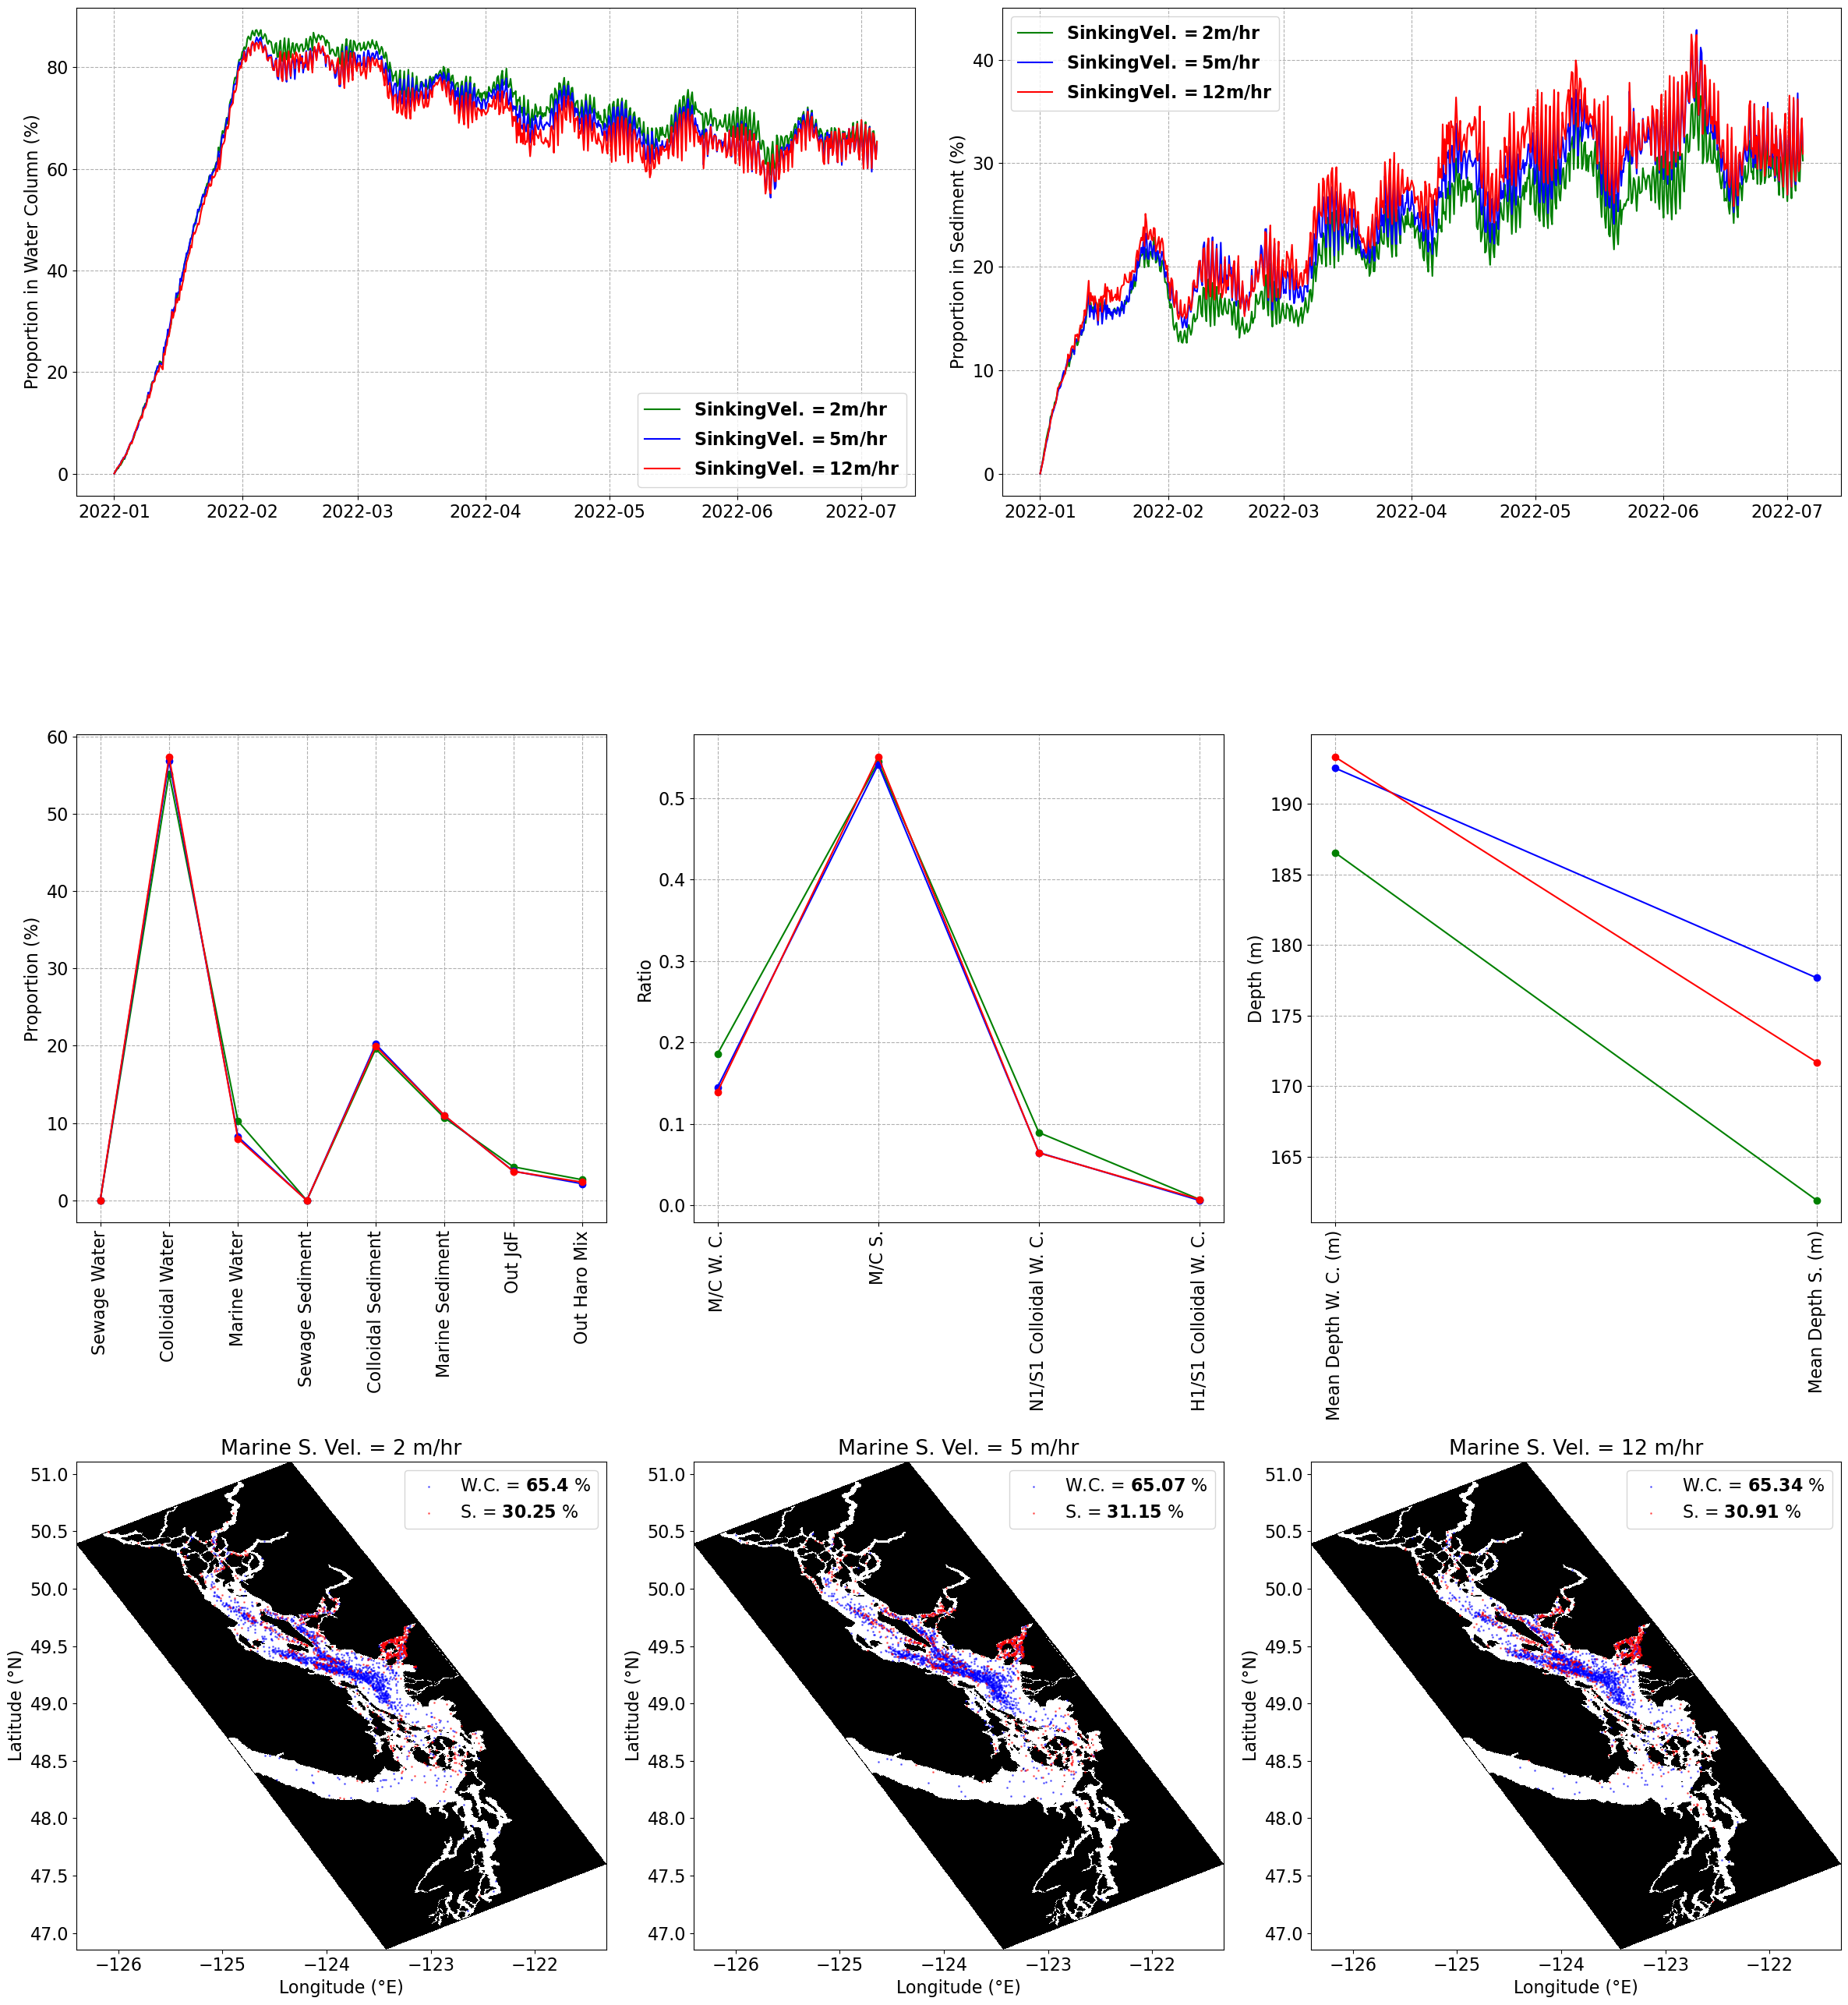

In [14]:
plt.rcParams.update({'font.size': 16})
#
data_marine_sinkvel_2 = xr.open_zarr(filenames_marine_sinkvel_testing[0])
wc_marine_sinkvel_2 = data_marine_sinkvel_2.where((data_marine_sinkvel_2.status < 4)& (data_marine_sinkvel_2.status > 0))
sed_marine_sinkvel_2 = data_marine_sinkvel_2.where((data_marine_sinkvel_2.status > 10))
data_marine_sinkvel_5 = xr.open_zarr(filenames_marine_sinkvel_testing[1])
wc_marine_sinkvel_5 = data_marine_sinkvel_5.where((data_marine_sinkvel_5.status < 4)& (data_marine_sinkvel_5.status > 0))
sed_marine_sinkvel_5 = data_marine_sinkvel_5.where((data_marine_sinkvel_5.status > 10))
data_marine_sinkvel_12 = xr.open_zarr(filenames_marine_sinkvel_testing[2])
wc_marine_sinkvel_12 = data_marine_sinkvel_12.where((data_marine_sinkvel_12.status < 4)& (data_marine_sinkvel_12.status > 0))
sed_marine_sinkvel_12 = data_marine_sinkvel_12.where((data_marine_sinkvel_12.status > 10))
#

# Create custom GridSpec: 3 rows, 6 columns
fig = plt.figure(figsize=(24, 26))
gs = gridspec.GridSpec(3, 6)

# === Top row (2 panels) ===
ax1 = fig.add_subplot(gs[0, 0:3])
ax2 = fig.add_subplot(gs[0, 3:6])

# === Middle row (3 panels) ===
ax3 = fig.add_subplot(gs[1, 0:2])
ax4 = fig.add_subplot(gs[1, 2:4])
ax5 = fig.add_subplot(gs[1, 4:6])

# === Bottom row (3 map panels) ===
ax6 = fig.add_subplot(gs[2, 0:2])
ax7 = fig.add_subplot(gs[2, 2:4])
ax8 = fig.add_subplot(gs[2, 4:6])

# === Plotting ===

# Top left
ax1.plot(water_marine_sinkvel_2, 'g', label=rf"$\bf{{Sinking Vel. = 2 m/hr}}$")
ax1.plot(water_marine_sinkvel_5, 'b', label=rf"$\bf{{Sinking Vel. = 5 m/hr}}$")
ax1.plot(water_marine_sinkvel_12, 'r', label=rf"$\bf{{Sinking Vel. = 12 m/hr}}$")
ax1.grid(linestyle='--')
ax1.legend()
ax1.set_ylabel('Proportion in Water Column (%)')

# Top right
ax2.plot(sediment_marine_sinkvel_2, 'g', label=rf"$\bf{{Sinking Vel. = 2 m/hr}}$")
ax2.plot(sediment_marine_sinkvel_5, 'b', label=rf"$\bf{{Sinking Vel. = 5 m/hr}}$")
ax2.plot(sediment_marine_sinkvel_12, 'r', label=rf"$\bf{{Sinking Vel. = 12 m/hr}}$")
ax2.grid(linestyle='--')
ax2.legend()
ax2.set_ylabel('Proportion in Sediment (%)')

# Middle left
ax3.plot(run_marine_sinkvel_2.columns[1:], run_marine_sinkvel_2.iloc[-1][1:].values, '-o', color='g')
ax3.plot(run_marine_sinkvel_5.columns[1:], run_marine_sinkvel_5.iloc[-1][1:].values, '-o', color='b')
ax3.plot(run_marine_sinkvel_12.columns[1:], run_marine_sinkvel_12.iloc[-1][1:].values, '-o', color='r')
ax3.grid(linestyle='--')
ax3.tick_params(axis='x', rotation=90)
ax3.set_ylabel('Proportion (%)')

# Middle center
ax4.plot(table_marine_sinkvel_2.columns[1:5], table_marine_sinkvel_2.loc[0].values[1:5], '-o', color='g')
ax4.plot(table_marine_sinkvel_5.columns[1:5], table_marine_sinkvel_5.loc[0].values[1:5], '-o', color='b')
ax4.plot(table_marine_sinkvel_12.columns[1:5], table_marine_sinkvel_12.loc[0].values[1:5], '-o', color='r')
ax4.grid(linestyle='--')
ax4.tick_params(axis='x', rotation=90)
ax4.set_ylabel('Ratio')

# Middle right
ax5.plot(table_marine_sinkvel_2.columns[-2:], table_marine_sinkvel_2.loc[0].values[-2:], '-o', color='g')
ax5.plot(table_marine_sinkvel_5.columns[-2:], table_marine_sinkvel_5.loc[0].values[-2:], '-o', color='b')
ax5.plot(table_marine_sinkvel_12.columns[-2:], table_marine_sinkvel_12.loc[0].values[-2:], '-o', color='r')
ax5.grid(linestyle='--')
ax5.tick_params(axis='x', rotation=90)
ax5.set_ylabel('Depth (m)')

# === Spatial patterns ===

# Map 1
ax6.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax6.scatter(wc_marine_sinkvel_2.lon[:,-1], wc_marine_sinkvel_2.lat[:,-1], c='b', s=1, alpha=.5, label=rf"W.C. = $\mathbf{{{np.round(water_marine_sinkvel_2[-1], 2)}}}\ \%$")
ax6.scatter(sed_marine_sinkvel_2.lon[:,-1], sed_marine_sinkvel_2.lat[:,-1], c='r', s=1, alpha=.5, label=rf"S. = $\mathbf{{{np.round(sediment_marine_sinkvel_2[-1], 2)}}}\ \%$")
ax6.set_title(r'Marine S. Vel. = 2 m/hr')
ax6.set_ylabel('Latitude (°N)')
ax6.set_xlabel('Longitude (°E)')
ax6.legend()

# Map 2
ax7.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax7.scatter(wc_marine_sinkvel_5.lon[:,-1], wc_marine_sinkvel_5.lat[:,-1], c='b', s=1, alpha=.5, label=rf"W.C. = $\mathbf{{{np.round(water_marine_sinkvel_5[-1], 2)}}}\ \%$")
ax7.scatter(sed_marine_sinkvel_5.lon[:,-1], sed_marine_sinkvel_5.lat[:,-1], c='r', s=1, alpha=.5, label=rf"S. = $\mathbf{{{np.round(sediment_marine_sinkvel_5[-1], 2)}}}\ \%$")
ax7.set_title(r'Marine S. Vel. = 5 m/hr')
ax7.set_ylabel('Latitude (°N)')
ax7.set_xlabel('Longitude (°E)')
ax7.legend()

# Map 3
ax8.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap=cmap)
ax8.scatter(wc_marine_sinkvel_12.lon[:,-1], wc_marine_sinkvel_12.lat[:,-1], c='b', s=1, alpha=.5, label=rf"W.C. = $\mathbf{{{np.round(water_marine_sinkvel_12[-1], 2)}}}\ \%$")
ax8.scatter(sed_marine_sinkvel_12.lon[:,-1], sed_marine_sinkvel_12.lat[:,-1], c='r', s=1, alpha=.5, label=rf"S. = $\mathbf{{{np.round(sediment_marine_sinkvel_12[-1], 2)}}}\ \%$")
ax8.set_title(r'Marine S. Vel. = 12 m/hr')
ax8.set_ylabel('Latitude (°N)')
ax8.set_xlabel('Longitude (°E)')
ax8.legend()

# Final layout
plt.tight_layout()
plt.show()


We may need to define another way of pushing particles from the bottom. Beacause, with this set up, changing the Sinking Velocity of marine particles does not affect the simulation results